<a href="https://colab.research.google.com/github/castudil/som-lstm/blob/main/MiniSOm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=b570e74763dd9b442419b4a7a4978ad9ae060f766f2ceb4ad5e99db6d04e09c0
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
from minisom import MiniSom    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit


from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

# Colors


In [ ]:

def normalize(df):
  """
  Función que normaliza los datos de un dataFrame en el rango [0,1]
  """
  result = df.copy()
  for feature_name in df.columns:
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = (df[feature_name] -
                            min_value) / (max_value - min_value)
  return result.astype(np.float32)

In [ ]:
## Lectura de datos de entrada desde un archivo
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SOms/colors.csv') # La última columna del archivo de datos es una etiqueta
print(df)
data = normalize(df[['R', 'G', 'B']]).values
name = df['Color-Name'].values
n_dim = len(df.columns) - 1

# Datos para el entrenamiento
colors = data
color_names = name


      R    G    B  Color-Name
0     0    0    0       Black
1   255  255  255       White
2   255    0    0         Red
3     0  255    0        Lime
4     0    0  255        Blue
5   255  255    0      Yellow
6     0  255  255        Aqua
7   255    0  255     Magenta
8   128  128    0       Olive
9     0  128    0       Green
10  128    0  128      Purple
11    0    0  128        Navy
12  255   69    0  Orange Red
13  255  165    0     Orange 
14  255  215    0        Gold
15  240  230  140       Khaki


In [ ]:
som_shape = (15,10)
som = MiniSom(som_shape[0], som_shape[1], n_dim, sigma=10, learning_rate=0.5, random_seed=123) # inicialización SOM

def entrenamiento():
  som.train(colors, 100000, verbose=True) # Entrenar SOM con 2000 iteraciones

time = timeit.timeit('entrenamiento()', number=1, setup='from __main__ import entrenamiento')
print('Tiempo de entrenamiento: '+ str(time))



/usr/local/lib/python3.7/dist-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.29262429933059464
Tiempo de entrenamiento: 44.986309896999956


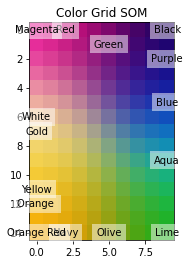

In [ ]:
# Obtiene la grilla de salida
image_grid = som.get_weights()

# Asignar los colores a sus neuronas más cercanas
mapped = som.win_map(colors)

# Plot
plt.imshow(image_grid)
plt.title('Color Grid SOM')
for i, m in enumerate(mapped): 
  plt.text(m[1], m[0], color_names[i], ha='center', va='center', 
           bbox=dict(facecolor='white', alpha=0.5, lw=0))

# Diabete

## Datos

In [ ]:
url='https://raw.githubusercontent.com/piremonte/datasets/master/Diabetes%20Disease%20Updated%20Dataset/diabetes.csv'
df = pd.read_csv(url, sep=',', decimal=".")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
target = df['Outcome'].values
label_names = {0:'Negativo', 1:'Positivo'}
data = df[df.columns[:-1]]

# data normalization
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [ ]:
data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

## SOM

In [ ]:
# Initialization and training
n_neurons = 30
m_neurons = 30
# initialization and training of 25x25 SOM
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=2, learning_rate=.5,
              activation_distance='euclidean', neighborhood_function='gaussian', random_seed=11)

som.pca_weights_init(data)
som.train(data, 10000, verbose=True)  # random training

som.topographic_error(data)


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 10.414331517736395


0.045572916666666664

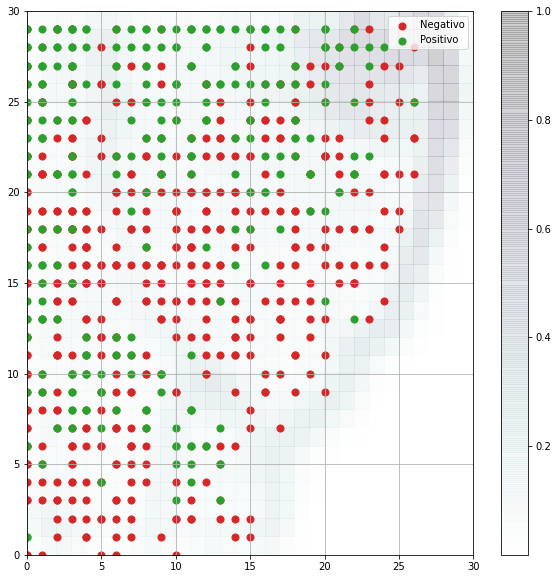

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

colors = ['C3', 'C2']

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target],#+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target],#+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.show()

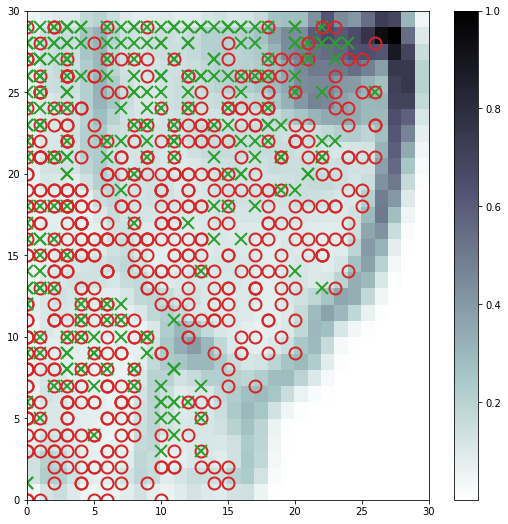

In [ ]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# different colors and markers for each label
markers = ['o', 'x']
colors = ['C3', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0], w[1], markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2,label=label_names[c])

plt.show()

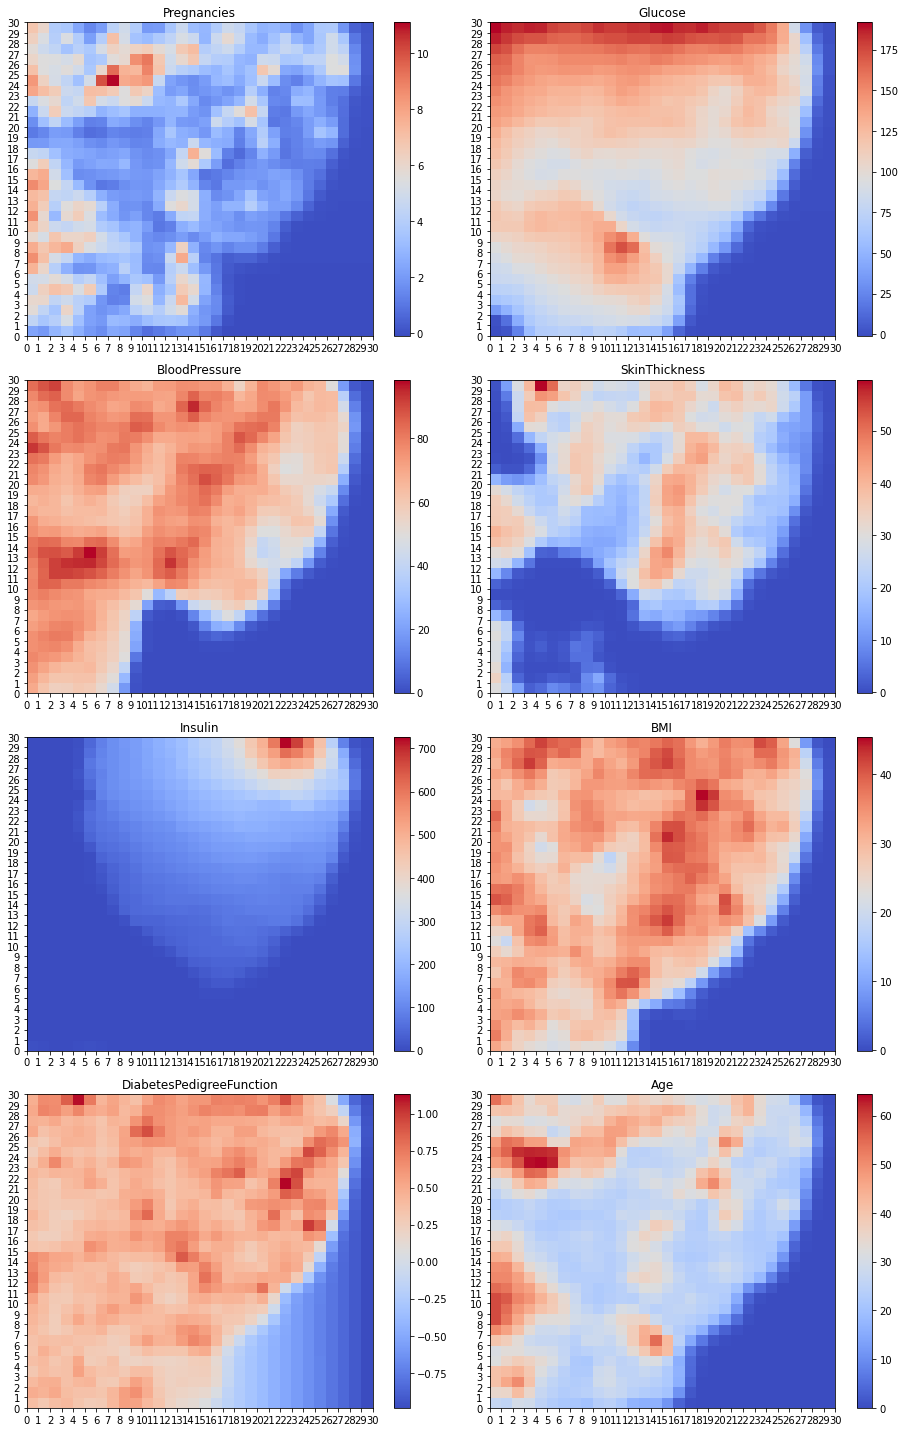

In [ ]:
W = som.get_weights()
plt.figure(figsize=(13, 20))

for i, f in enumerate(df.columns[:-1]):
    plt.subplot(4, 2, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(n_neurons+1))
    plt.yticks(np.arange(m_neurons+1))
plt.tight_layout()
plt.show()

# PM25


In [ ]:
def filter_data(data, start_year=16,end_year=20):
  filtered_df = pd.DataFrame()
  lista = []
  # filter the dataset between the months of April and August from 2016 to 2020
  for i in range(start_year,end_year+1):
    lista.append(data.loc['20'+str(i)+'-04-1': '20'+str(i)+'-08-31'])

  # consolidating into a single data frame
  filtered_df = pd.concat(lista)

  print(filtered_df.describe())
  print(filtered_df.index.min())
  print(filtered_df.index.max())
  return filtered_df

In [ ]:
path = 'https://raw.githubusercontent.com/castudil/som-lstm/main/data/talca.csv' # use your path
df = pd.read_csv(path, sep=',', decimal=".")
df['date'] = pd.to_datetime(df['date']) # convierte la columna date en datetime
df = df.set_index('date') # Selecciona a la columna date como index
df = df.resample('D').mean() # Promedia el pm25 para el dia
df = filter_data(df)


             PM25
count  765.000000
mean    28.361704
std     20.275860
min      0.000000
25%     13.791667
50%     24.304574
75%     37.291667
max    144.876154
2016-04-01 00:00:00
2020-08-31 00:00:00


In [ ]:
df

,PM25
date,
2016-04-01,12.600413
2016-04-02,19.202456
2016-04-03,15.858957
2016-04-04,14.033206
2016-04-05,29.503325
...,...
2020-08-27,27.750000
2020-08-28,4.666667
2020-08-29,8.208333


In [ ]:
data = []

for dato in df[df.columns[0]]:
  data.append(np.reshape(dato, 1))
# data normalization
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)


In [ ]:
# Initialization and training
n_neurons = 30
m_neurons = 30
# initialization and training of 25x25 SOM
som = MiniSom(n_neurons, m_neurons, 1, sigma=1.5, learning_rate=.5,
              activation_distance='euclidean', neighborhood_function='gaussian', random_seed=11)

som.train(data, 10000, verbose=True)  # random training

som.topographic_error(data)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.18153956973194962


0.8588235294117647

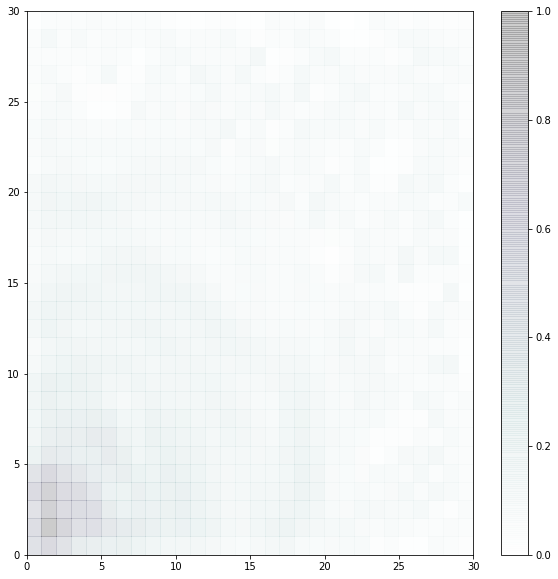

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

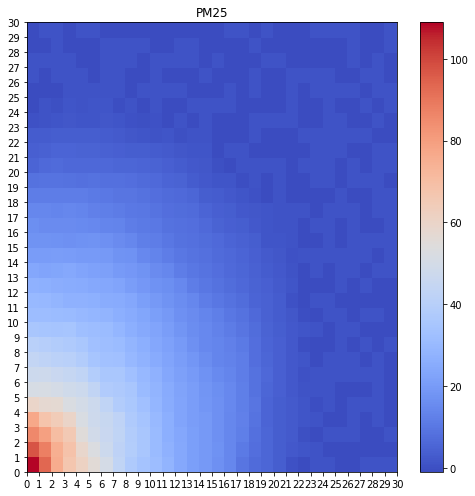

In [ ]:
W = som.get_weights()
plt.figure(figsize=(7, 7))

for i, f in enumerate(df):
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(n_neurons+1))
    plt.yticks(np.arange(m_neurons+1))
plt.tight_layout()
plt.show()

#Iris

In [ ]:
url='https://raw.githubusercontent.com/piremonte/datasets/master/iris/Iris.csv'
df = pd.read_csv(url, sep=',', decimal=".")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
target = df['Species'].astype('category').cat.codes
label_names = {0:'setosa', 1:'versicolor', 2: "virginica"}

data = df[df.columns[1:5]]

# data normalization
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data = data.values

In [ ]:
# Initialization and training
n_neurons = 15
m_neurons = 15
# initialization and training of 25x25 SOM
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=2, learning_rate=.5,
              activation_distance='euclidean', neighborhood_function='gaussian', random_seed=11)

som.pca_weights_init(data)
som.train(data, 100000, verbose=True)  # random training

som.topographic_error(data)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.11788180742936419


0.04

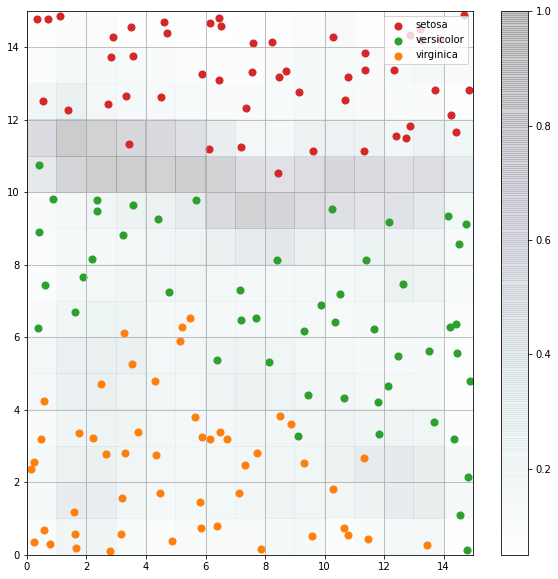

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

colors = ['C3', 'C2', "C1"]

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.show()

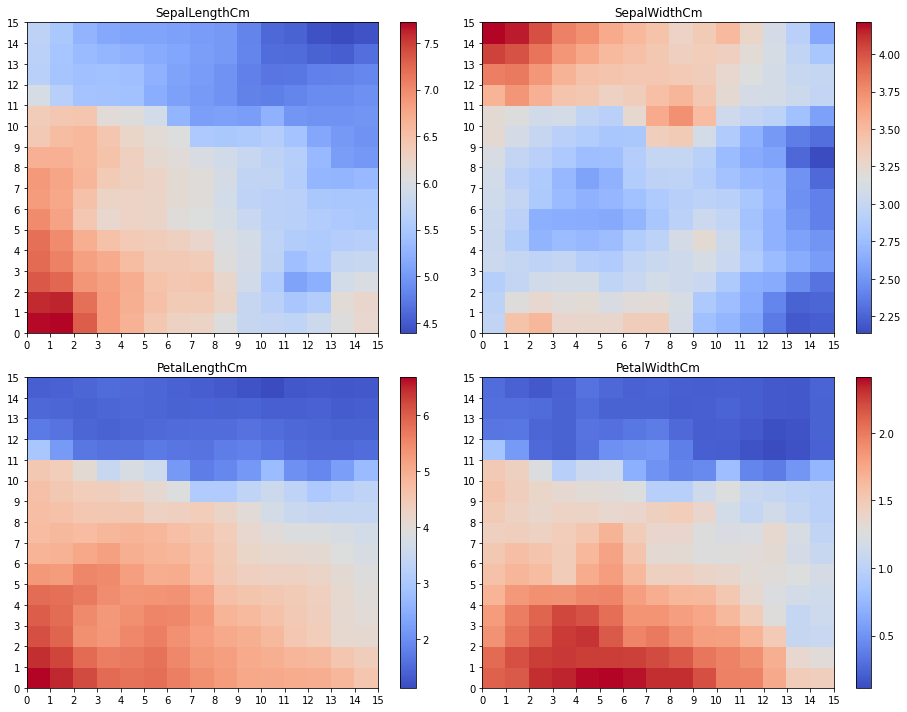

In [ ]:
W = som.get_weights()
plt.figure(figsize=(13, 10))

for i, f in enumerate(df.columns[1:5]):
    plt.subplot(2, 2, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(n_neurons+1))
    plt.yticks(np.arange(m_neurons+1))
plt.tight_layout()
plt.show()